In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# files are datasets/star-cluster-simulations/c_0000.csv - c_1800.csv, increments of 100
# stars from 0 through 6399

filenames = {}

orderedid = {}

# generate list from 00 to 18 ? 
listnum = ['00', '01','02','03','04','05',
           '06','07','08','09','10','11','12',
           '13','14','15','16','17','18']

for i in listnum:
    # just taking the data
    filenames[i] = pd.read_csv('datasets/star-cluster-simulations/c_{}00.csv'.format(i))
    # ordering it by the id 
    orderedid[i] =  filenames[i].reindex(index=filenames[i]['id'])
    del orderedid[i]['id']

# just to see/double check the order of the columns...
orderedid['00'].iloc[:3,:]

,x,y,z,vx,vy,vz,m
id,,,,,,,
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


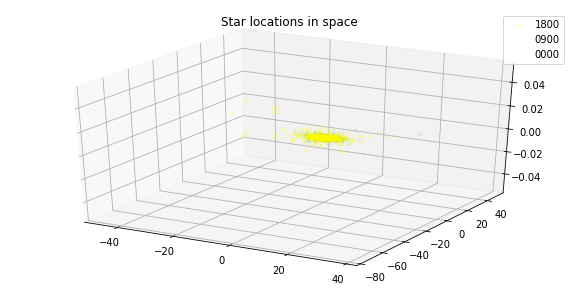

In [4]:
# all of the stars locations at 00:00

# get the x
all_x = filenames['00'].loc[:,'x']

# get the y
all_y = filenames['00'].loc[:,'y']

# get the z
all_z = filenames['00'].loc[:,'z']


allstarsloc = pd.DataFrame(index=range(len(filenames['00'])))
allstarsloc['x'] = all_x
allstarsloc['y'] = all_y
allstarsloc['z'] = all_z

plt.figure(figsize=(10,5)).gca(projection='3d')
plt.scatter(filenames['18'].loc[:,'x'], filenames['18'].loc[:,'y'], filenames['18'].loc[:,'z'],
           color='yellow', alpha=.17,label='1800')
plt.scatter(filenames['09'].loc[:,'x'], filenames['09'].loc[:,'y'], filenames['09'].loc[:,'z'],
               color='green',alpha=.05, label='0900'
           )
plt.scatter(allstarsloc['x'], allstarsloc['y'], allstarsloc['z'],
    color='purple', alpha=.20, label='0000'
)

plt.title('Star locations in space')
plt.legend()
plt.show()

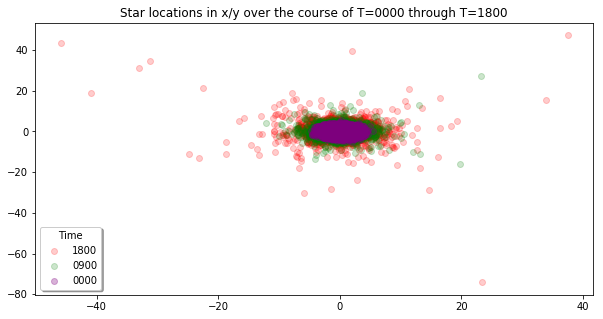

In [5]:
# all stars locations over the course of the day in x, y

plt.figure(figsize=(10,5))
plt.scatter(x=filenames['18'].loc[:,'x'], y=filenames['18'].loc[:,'y'], 
           color='red', alpha=.20,label='1800'
           )
plt.scatter(x=filenames['09'].loc[:,'x'], y=filenames['09'].loc[:,'y'],
               color='green',alpha=.20, label='0900'
           )
plt.scatter(x=allstarsloc['x'], y=allstarsloc['y'],
    color='purple', alpha=.30, label='0000'
           )

plt.title('Star locations in x/y over the course of T=0000 through T=1800')
plt.legend(shadow=True, title='Time')
plt.show()

In [6]:
# mean of x, y, z, to get the cluster "center" at each time

mean_x = []
mean_y = []
mean_z = []

for num in listnum:
    mean_x.append(np.mean(filenames[num].loc[:,'x']))
    mean_y.append(np.mean(filenames[num].loc[:,'y']))
    mean_z.append(np.mean(filenames[num].loc[:,'z']))

# filenames['00'].mode()

#from scipy import stats
#stats.mode(filenames['00'], axis=None)

centroid = pd.DataFrame(index=listnum)
centroid['x'] = mean_x
centroid['y'] = mean_y
centroid['z'] = mean_z

centroid

,x,y,z
00,-1.176595e-10,3.412734e-10,2.464757e-10
01,2.750745e-05,9.237395e-04,-3.431984e-04
02,-1.445949e-03,3.365790e-03,-5.762731e-04
03,-6.491956e-03,7.228926e-03,-1.250761e-03
04,-1.268588e-02,1.339715e-02,-1.657701e-03
05,-1.994709e-02,1.853387e-02,-1.174266e-03
06,-2.815595e-02,2.453804e-02,-1.029976e-03
07,-3.775023e-02,3.304917e-02,6.543372e-04
08,-4.520098e-02,4.246163e-02,1.570002e-03
09,-4.979455e-02,5.113649e-02,1.574555e-03


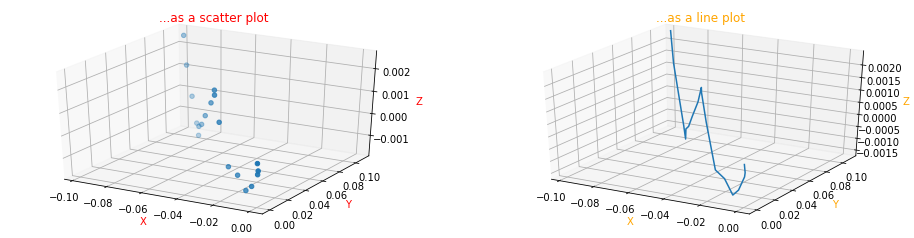

In [57]:
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(mean_x, mean_y, mean_z)
ax.set_xlabel('X', color='red')
ax.set_ylabel('Y', color='red')
ax.set_zlabel('Z', color='red')
plt.title('...as a scatter plot', color='red')

ax = fig.add_subplot(122, projection='3d')
ax.plot(mean_x,mean_y,mean_z)
ax.set_xlabel('X', color='orange')
ax.set_ylabel('Y', color='orange')
ax.set_zlabel('Z', color='orange')
plt.title('...as a line plot', color='orange')

    
plt.show()

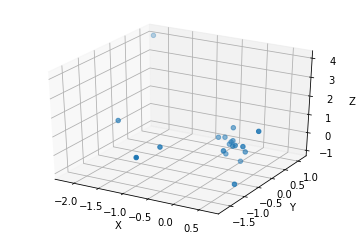

In [6]:
# show how 1 star is moving from T = 0000 to T= 1800
# lets say 6399

star = 6399

one_x = []
one_y = []
one_z = []

for i in listnum:
    one_x.append(orderedid[i].at[star,'x'])
    one_y.append(orderedid[i].at[star,'y'])
    one_z.append(orderedid[i].at[star,'z'])   
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
plt.show()

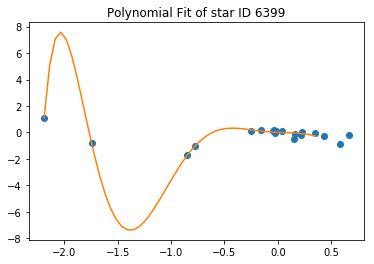

In [7]:
# fit a polynomial based on one star (the same one)

z = np.polyfit(one_x,one_y,7)
f = np.poly1d(z)

x_new = np.linspace(one_x[0], one_x[-1], 50)
y_new = f(x_new)

plt.plot(one_x,one_y,'o', x_new, y_new)
plt.title('Polynomial Fit of star ID {}'.format(star))
ax = plt.gca()
#ax.set_facecolor('gray')
fig = plt.gcf()
#py.plot_mpl(fig, filename='polynomial-Fit-with-matplotlib')


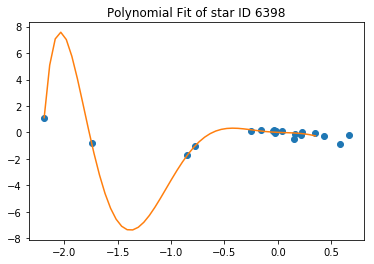

In [8]:
# given that polynomial, guess a neighboring stars projected location

star2 = star-1

two_x = []
two_y = []
two_z = []

for i in listnum:
    two_x.append(orderedid[i].at[star,'x'])
    two_y.append(orderedid[i].at[star,'y'])
    two_z.append(orderedid[i].at[star,'z']) 
    
# just through :12 in order to estimate the rest based off the polynomial
z2 = np.polyfit(two_x[:12],two_y[:12],7)
f2 = np.poly1d(z2)

x2_new = np.linspace(two_x[0], two_x[-1], 50)
y2_new = f(x2_new)

plt.plot(two_x,two_y,'o', x2_new, y2_new)
plt.title('Polynomial Fit of star ID {}'.format(star2))
ax = plt.gca()
fig = plt.gcf()